In [1]:
import numpy as np
from SolveTriangular import Lsolve, Usolve
import scipy as sp
import matplotlib.pyplot as plt

# Algoritmi

## Zeri di funzioni

In [2]:
def metodo_bisezione(fname, a, b, tolx): 
    fa=fname(a)
    fb=fname(b)
    if np.sign(fa)*np.sign(fb) > 0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None,None
    
    it = 0
    v_xk = []
    erroreX = tolx+1
    maxit = np.ceil(np.log2(np.abs(b-a)/tolx))
    
    while it < maxit and erroreX > tolx:
        xk = a + (b-a)/2 # più stabile rispetto (b+a)/2
        v_xk.append(xk)
        it += 1
        fxk=fname(xk)
        if fxk==0:
            return xk, it, v_xk
        
        if np.sign(fb)*np.sign(fxk) <= 0: # radice nel range [xk, b]
            a = xk
            fa= fxk 
        elif np.sign(fa)*np.sign(fxk) <= 0: # radice nel range [a, xk]
            b = xk
            fb= fxk

        erroreX = np.abs(b-a)

    return xk, it, v_xk

In [3]:
def falsa_posizione(fname,a,b,tolx,tolf,maxit):
    fa=fname(a)
    fb=fname(b)
    if np.sign(fa)*np.sign(fb) > 0:
        print("Metodo di bisezione non applicabile")
        return None,None,None
    
    it=0
    v_xk=[]
    fxk=1+tolf
    erroreX=1+tolx
    erroreF=1+tolf
    xprec=a
    while it < maxit and erroreX > tolx and erroreF > tolf:
        xk= a - fa*(b-a)/(fb-fa)
        v_xk.append(xk)
        it+=1
        fxk=fname(xk)
        if fxk==0:
            return xk,it,v_xk
    
        if np.sign(fa)*np.sign(fxk) < 0: # radice nel range [a, xk]
            b= xk
            fb= fxk
        elif np.sign(fb)*np.sign(fxk) < 0: # radice nel range [xk, b] 
            a=xk
            fa=fxk
        if xk!=0:
            erroreX=np.abs(xk-xprec)/np.abs(xk)
        else:
            erroreX=np.abs(xk-xprec)

        erroreF = np.abs(fxk)
        xprec=xk
    
    return xk,it,v_xk

In [4]:
def corde(fname,coeff_ang,x0,tolx,tolf,nmax):
    # coeff_ang è il coefficiente angolare della retta che rimane fisso per tutte le iterazioni
    xk=[]
    
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while it < nmax and errorex > tolx and erroref > tolf:
        fx0=fname(x0)
        d=fx0/coeff_ang
      
        x1=x0 - d
        fx1=fname(x1)
        if x1!=0:
            errorex=np.abs(d)/np.abs(x1) 
        else:
            errorex=np.abs(d)
       
        erroref=np.abs(fx1)
       
        x0=x1
        it=it+1
        xk.append(x1)

    if it==nmax:
        print('Corde : raggiunto massimo numero di iterazioni \n')
    
    return x1,it,xk

In [5]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
  
    xk=[]
    
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while it < nmax and errorex > tolx and erroref > tolf:
        fx0=fname(x0)
        fpx0=fpname(x0)
        if np.abs(fpx0) <= np.spacing(1): 
            print(" derivata prima nulla in x0")
            return None, None,None
        
        d=fx0/fpx0
    
        x1=x0 - d
        fx1=fname(x1)
        erroref=np.abs(fx1)
        if x1!=0:
            errorex=np.abs(d)/np.abs(x1)
        else:
            errorex=np.abs(d)
    
        it=it+1
        x0=x1
        xk.append(x1)
    
    if it==nmax:
        print('Newton: raggiunto massimo numero di iterazioni \n')
    
    return x1,it,xk

In [6]:
def newton_modificato(fname,fpname,m,x0,tolx,tolf,nmax):
    #m è la molteplicità dello zero
    
    xk=[]
    
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while it < nmax and errorex > tolx and erroref > tolf:
       
        fx0=fname(x0)
        fpx0 = fpname(x0)
        if np.abs(fpx0) <= np.spacing(1):
            print(" derivata prima nulla in x0")
            return None, None,None
        d=fx0/fpx0
    
        x1=x0 - m*d
        fx1=fname(x1)
        erroref=np.abs(fx1)
        if x1!=0:
            errore=np.abs(d)/np.abs(x1)
        else:
            errore=np.abs(d)
        
        it=it+1
        x0=x1
        xk.append(x1)
    
    if it==nmax:
        print('Newton modificato: raggiunto massimo numero di iterazioni \n')
    
    return x1,it,xk

In [7]:
def secanti(fname,xm1,x0,tolx,tolf,nmax):
        xk=[]
        
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while it < nmax and errorex > tolx and erroref > tolf:
            
            fxm1=fname(xm1)
            fx0=fname(x0)
            d=fx0*(x0-xm1)/(fx0-fxm1)

            x1=x0 - d
          
            
            fx1=fname(x1)
            xk.append(x1);
            if x1!=0:
                errorex=np.abs(d)/np.abs(x1) 
            else:
                errorex=np.abs(d)
                
            erroref=np.abs(fx1)
            xm1=x0
            x0=x1
            
            it=it+1;
           
       
        if it==nmax:
           print('Secanti: raggiunto massimo numero di iterazioni \n')
        
        return x1,it,xk

## Stima dell'ordine di una funzione

In [8]:
def stima_ordine(xk,iterazioni):
     # Fornito direttamente dagli scheletri

      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine

## Soluzione di sistemi non lineari

In [9]:
def newton_raphson(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    while it < max_iterations and erroreF > tolF and erroreX > tolX:
        jx = J_Numerical(X[0], X[1])
        
        if np.linalg.det(jx) == 0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
        
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(Xnew-X,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(Xnew-X,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

In [10]:
def newton_raphson_corde(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it < max_iterations and erroreX > tolX and erroreF > tolF:
        if it==0:
            jx = J_Numerical(X[0], X[1])
        
            if np.linalg.det(jx) == 0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(Xnew-X,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(Xnew-X,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

In [11]:
def newton_raphson_sham(initial_guess, update, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it < max_iterations and erroreX > tolX and erroreF > tolF:
        if it%update==0:
            jx = J_Numerical(X[0], X[1])
        
            if np.linalg.det(jx) == 0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(Xnew-X,1)/normaXnew 
        else:
            erroreX=np.linalg.norm(Xnew-X,1)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

## Minimo di funzione non lineare

In [12]:
def newton_raphson_minimo(initial_guess, grad_func, Hessian_func, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it < max_iterations and erroreF > tolF and erroreX > tolX:
        Hx = Hessian_func(X[0], X[1])
        
        if np.linalg.det(Hx) == 0:
            print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
        
        gfx =  grad_func(X[0], X[1])
        gfx = gfx.squeeze() 
        
        s = np.linalg.solve(Hx, -gfx)
        
        Xnew=X + s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew!=0:
            erroreX=np.linalg.norm(Xnew-X)/normaXnew
        else:
            erroreX=np.linalg.norm(Xnew-X)
            
        errore.append(erroreX)
        gfxnew=grad_func(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(gfxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

## Soluzione di sistemi lineari

![MappaConcettualeSistemiLineari.png](MappaConcettualeSistemiLineari.png)

$m = n$:
- Piccola ($n \in [1,100]$) e densa ($densità > 0.33$):
    - Ben condizionata ($K < 1000$): Fattorizzazione Gauss (LU)
    - Mal condizionata ($K >= 1000$) >= 1000: Fattorizzazione QR
    - Simmetrica ($A^T = A$) e definita positiva ($det(A) \ne 0$): Fattorizzazione Cholesky
- Grande ($n \in [300, 500]$) e sparsa ($densità \le 0.33$):
    - Diagonale strettamente dominante ($a_{i,i} > \sum_{j \ne i}(a_{i,j})$): Jacobi, Gauss-Seidel, Gauss-Seidel-SOR
    - Simmetrica ($A^T = A$) e definita positiva ($det(A) \ne 0$): Gauss-Seidel, Gauss-Seidel-SOR, Steepest-Descent, Gradiente cogniugato

$m > n$ (sistemi sovradeterminati):
- Rango massimo ($rank(A) = min(m, n)$):
    - Ben condizionata ($K < 100$): Equazioni normali
    - Mediamente condizionata ($K \in [100, 1000]$): QRLS
- Rango qualunque o mal condizionata ($K > 1000$): SVDLS

### Sistemi lineari con unica soluzione (m=n)

In [13]:
# m = n
# Piccola e densa
# Ben condizionata
def LUsolve(A, b):
    PT, L, U = sp.linalg.lu(A)
    P=PT.T.copy()

    pb = P@b
    x, flag = Lsolve(L, pb)
    if flag == 0:
        return Usolve(U, x)
    return None, flag

In [14]:
# m = n
# Piccola e densa
# Mal condizionata
def QRSolve(A, B):
    Q, R = sp.linalg.qr(A)
    x = Q.T@b
    return Usolve(R, x)

In [15]:
# m = n
# Piccola e densa
# Simmetrica e definita positiva
def CholeskySolve(A, b):
    L = sp.linalg.cholesky(A, lower=True)
    U = L.T

    x, flag = Lsolve(L, b)
    if flag == 0:
        return Usolve(U, x)
    return None, flag

In [16]:
# m = n
# Grande e sparsa
# Diagonale strettamente dominante
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    D=np.diag(d)
    E=np.tril(A, -1) 
    F=np.triu(A, 1)
    M=D
    N=-(E+F)
    Minv=np.linalg.inv(M)
    T=Minv@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<it_max and errore>toll:
        x=T@x0 + Minv@b
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x) 
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [17]:
# m = n
# Grande e sparsa
# Diagonale strettamente dominante OR Simmetrica e definita positiva
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A, -1)
    F=np.triu(A, 1)
    M=D+E
    N=-F
    Minv=np.linalg.inv(M)
    T=Minv@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<it_max and errore>toll:
        x, _=Lsolve(M, b+N@x0) 
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [18]:
# m = n
# Grande e sparsa
# Diagonale strettamente dominante OR Simmetrica e definita positiva
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A, -1)
    F=np.tril(A, 1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    Momegainv=np.linalg.inv(Momega)
    T=Momegainv@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F 
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        xtilde, flag= Lsolve(M, b+N@x0)
        xnew=(1-omega)*xold+omega*xtilde 
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

In [19]:
# m = n
# Grande e sparsa
# Simmetrica e definita positiva
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
    # inizializzare le variabili necessarie
    x = x0
    
     
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x.copy())
    vet_r=[]
    vet_r.append(errore)
     
    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore > tol: 
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x + alpha*p
        
         
        vec_sol.append(x.copy())
        r=r + alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r # direzione opposta al gradiente per massima discesa
        
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

In [20]:
# m = n
# Grande e sparsa
# Simmetrica e definita positiva
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while it < itmax and errore > tol:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap) 
        x = x + alpha*p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r= r + alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma*p # direzione del gradiente cogniugato lungo il piano formato da r e p
   
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

### Sistemi sovradeterminati (m>n)

In [21]:
# m > n
# Rango massimo
# Ben condizionata
def eqnorm(A,b):
 
    G=A.T@A # deve essere ben condizionata in quanto K(A.T@A) = K(A)^2
    f=A.T@b 

    # CholeskySolve(G, f)
    L=sp.linalg.cholesky(G, lower=True)
    U=L.T

    x, flag = Lsolve(L, f)
    if flag == 0:
        x, flag = Usolve(U, x)

    residuo = np.linalg.norm(A@x-b)**2
    return x, residuo

In [22]:
# m > n
# Rango massimo
# Mediamente condizionata
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=sp.linalg.qr(A)
    h=Q.T@b
    x,_ = Usolve(R[:n,:], h[:n])
    
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

In [23]:
# m > n
# Mal condizionata
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=spLin.svd(A)  
    
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh) 
    
    d=U.T@b
    d1=d[:k].reshape((k,1)) 
    s1=s[:k].reshape((k,1))
    
    c=d1/s1 
    x=V[:,:k]@c 
    residuo=np.linalg.norm(d[k:])**2 
    return x,residuo

## Approssimazione ai minimi quadrati

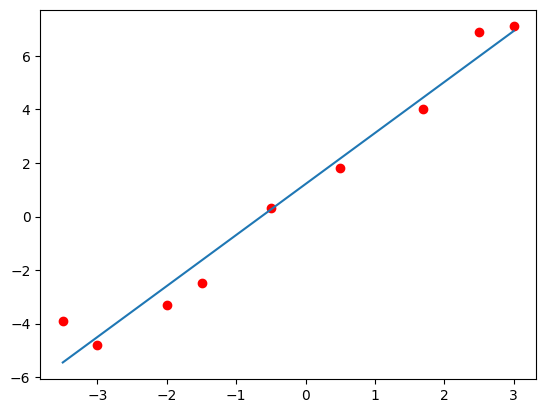

In [27]:
# punti noti
x = np.array([-3.5,-3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3]) 
y = np.array([-3.9,-4.8,-3.3,-2.5, 0.3,1.8,4,6.9,7.1])

n = 1 # grado del polinomio
n1 = n+1 # grado di libertà
A = np.vander(x, increasing=True)[:,:n1]
alpha, residuo = eqnorm(A, y) # risolvi il sistema sovradeterminato A@y

xx = np.linspace(np.min(x), np.max(x))
plt.plot(x, y, "ro") # punti da approssimare
plt.plot(xx, np.polyval(np.flip(alpha), xx)) # polinomio approssimatore
plt.show()

## Interpolazione polinomiale di Lagrange

In [25]:
def plagr(xnodi,j):
    
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[:j], xnodi[j+1,n])
    
    num=np.poly(xzeri)
    den=np.polyval(num, xnodi[j])
    
    p=num/den
    
    return p



def InterpL(x, y, xx):
     
     n=x.size
     m=xx.size 
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x, j)
        L[:,j]=np.polyval(p, xx) 
    
    
     return L@y